# Chapter 7

Diving more into `pandas`, with case specific examples. We will also explain why we often go with pandas only.

## Learning Goals

- `pandas`
- Apply() Operations
- Resample
- Rolling
- String operations
- Missing data
- Time Operations
- Advanced indexing, multilevel indexing
- Visualization with `pandas`
- Advanced plot controls

## Authors

- Mert Candar, mccandar@gmail.com
- Aras Kahraman, aras.kahraman@hotmail.com

## Learning Curve Boosters

https://github.com/justmarkham/pandas-videos

https://github.com/joeyajames/Python/tree/master/Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/

## String Operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
plt.style.use('seaborn')
rcParams['figure.figsize'] = (15,5)

In [3]:
orders = pd.read_csv("data/orders.tsv",sep='\t')

In [4]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
orders.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
orders['item_name'].str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
5                                CHICKEN BOWL
6                               SIDE OF CHIPS
7                               STEAK BURRITO
8                            STEAK SOFT TACOS
9                               STEAK BURRITO
10                        CHIPS AND GUACAMOLE
11                       CHICKEN CRISPY TACOS
12                         CHICKEN SOFT TACOS
13                               CHICKEN BOWL
14                        CHIPS AND GUACAMOLE
15      CHIPS AND TOMATILLO-GREEN CHILI SALSA
16                            CHICKEN BURRITO
17                            CHICKEN BURRITO
18                                CANNED SODA
19                               CHICKEN BOWL
20                        CHIPS AND GUACAMOLE
21                           BARBA

In [11]:
orders['item_name'] = orders['item_name'].str.lower()

In [12]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,chips and fresh tomato salsa,NaN,$2.39
1,1,1,izze,[Clementine],$3.39
2,1,1,nantucket nectar,[Apple],$3.39
3,1,1,chips and tomatillo-green chili salsa,NaN,$2.39
4,2,2,chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [22]:
mask = orders['item_name'].str.contains("chicken")
mask

0       False
1       False
2       False
3       False
4        True
5        True
6       False
7       False
8       False
9       False
10      False
11       True
12       True
13       True
14      False
15      False
16       True
17       True
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26       True
27      False
28      False
29       True
        ...  
4592    False
4593    False
4594    False
4595     True
4596    False
4597    False
4598    False
4599     True
4600    False
4601    False
4602    False
4603    False
4604     True
4605    False
4606    False
4607    False
4608    False
4609    False
4610    False
4611    False
4612    False
4613    False
4614    False
4615     True
4616    False
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [21]:
orders[mask]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,chicken bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,chicken crispy tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,chicken soft tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,chicken bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
16,8,1,chicken burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,chicken burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
19,10,1,chicken bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
23,12,1,chicken burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
26,13,1,chicken bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [23]:
orders['item_name'].str.len()

0       28
1        4
2       16
3       37
4       12
5       12
6       13
7       13
8       16
9       13
10      19
11      20
12      18
13      12
14      19
15      37
16      15
17      15
18      11
19      12
20      19
21      16
22      16
23      15
24       4
25      28
26      12
27      16
28      11
29      15
        ..
4592    16
4593    13
4594    13
4595    12
4596    19
4597    17
4598    13
4599    12
4600    19
4601    17
4602    16
4603    16
4604    12
4605    19
4606    17
4607    13
4608    14
4609    17
4610    13
4611    14
4612    13
4613     5
4614    13
4615    18
4616    19
4617    13
4618    13
4619    18
4620    18
4621    18
Name: item_name, Length: 4622, dtype: int64

In [24]:
orders['item_name'].str.join('-').head()

0    c-h-i-p-s- -a-n-d- -f-r-e-s-h- -t-o-m-a-t-o- -...
1                                              i-z-z-e
2                      n-a-n-t-u-c-k-e-t- -n-e-c-t-a-r
3    c-h-i-p-s- -a-n-d- -t-o-m-a-t-i-l-l-o---g-r-e-...
4                              c-h-i-c-k-e-n- -b-o-w-l
Name: item_name, dtype: object

In [26]:
orders['item_name'].str.isalpha().head()

0    False
1     True
2    False
3    False
4    False
Name: item_name, dtype: bool

In [27]:
orders['item_name'].str.isnumeric().head()

0    False
1    False
2    False
3    False
4    False
Name: item_name, dtype: bool

In [29]:
orders['item_name'].str.count('a').head()

0    4
1    0
2    2
3    4
4    0
Name: item_name, dtype: int64

In [30]:
orders['item_name'].str.cat(sep=' ', na_rep='?')

'chips and fresh tomato salsa izze nantucket nectar chips and tomatillo-green chili salsa chicken bowl chicken bowl side of chips steak burrito steak soft tacos steak burrito chips and guacamole chicken crispy tacos chicken soft tacos chicken bowl chips and guacamole chips and tomatillo-green chili salsa chicken burrito chicken burrito canned soda chicken bowl chips and guacamole barbacoa burrito nantucket nectar chicken burrito izze chips and fresh tomato salsa chicken bowl carnitas burrito canned soda chicken burrito chips and tomatillo-green chili salsa steak burrito side of chips carnitas bowl bottled water chicken soft tacos chicken soft tacos chips and guacamole chips and tomatillo green chili salsa barbacoa bowl chips chips and guacamole chicken bowl steak burrito chicken salad bowl chicken burrito steak burrito izze steak burrito chips and guacamole steak burrito canned soda chicken burrito canned soda steak bowl chips and fresh tomato salsa barbacoa soft tacos veggie burrito b

In [33]:
orders['choice_description'].str.replace("[","")

0                                                     NaN
1                                             Clementine]
2                                                  Apple]
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [34]:
orders['choice_description'] = orders['choice_description'].str.replace(["[",']'],"").str.replace("]","")

In [35]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,chips and fresh tomato salsa,NaN,$2.39
1,1,1,izze,Clementine,$3.39
2,1,1,nantucket nectar,Apple,$3.39
3,1,1,chips and tomatillo-green chili salsa,NaN,$2.39
4,2,2,chicken bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98
5,3,1,chicken bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",$10.98
6,3,1,side of chips,NaN,$1.69
7,4,1,steak burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",$11.75
8,4,1,steak soft tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",$9.25
9,5,1,steak burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",$9.25


## Missing Data

In [39]:
url = "http://bit.ly/uforeports"

In [40]:
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [41]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [42]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.6+ KB


In [43]:
ufo.isnull().head(100)

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
5,False,True,False,False,False
6,False,True,False,False,False
7,False,True,False,False,False
8,False,True,False,False,False
9,False,True,False,False,False


In [44]:
ufo.notnull().head(100)

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
5,True,False,True,True,True
6,True,False,True,True,True
7,True,False,True,True,True
8,True,False,True,True,True
9,True,False,True,True,True


In [46]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [48]:
mask = ufo['City'].isnull()
ufo[mask]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,1943-08-15 00:00:00
22,NaN,NaN,LIGHT,LA,1943-08-15 00:00:00
204,NaN,NaN,DISK,CA,1952-07-15 12:30:00
241,NaN,BLUE,DISK,MT,1953-07-04 14:00:00
613,NaN,NaN,DISK,NV,1960-07-01 12:00:00
1877,NaN,YELLOW,CIRCLE,AZ,1969-08-15 01:00:00
2013,NaN,NaN,NaN,NH,1970-08-01 09:30:00
2546,NaN,NaN,FIREBALL,OH,1973-10-25 23:30:00
3123,NaN,RED,TRIANGLE,WV,1975-11-25 23:00:00
4736,NaN,NaN,SPHERE,CA,1982-06-23 23:00:00


In [49]:
ufo.shape

(18241, 5)

In [50]:
ufo.dropna(how = "any")

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,1939-06-30 20:00:00
19,Bering Sea,RED,OTHER,AK,1943-04-30 23:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,SPHERE,CA,1946-06-30 19:00:00
82,San Jose,BLUE,CHEVRON,CA,1947-07-15 21:00:00
84,Modesto,BLUE,DISK,CA,1947-08-08 22:00:00
91,Scipio,RED,SPHERE,IN,1948-05-10 19:00:00
111,Tarrant City,ORANGE,CIRCLE,AL,1949-08-15 22:00:00
129,Napa,GREEN,DISK,CA,1950-06-10 00:00:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,1950-07-02 13:00:00


In [51]:
ufo.dropna(how = "all")

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00


In [52]:
ufo.dropna(how = "all",axis=1)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00


In [53]:
ufo.dropna(how = "any",axis=1)

,State,Time
0,NY,1930-06-01 22:00:00
1,NJ,1930-06-30 20:00:00
2,CO,1931-02-15 14:00:00
3,KS,1931-06-01 13:00:00
4,NY,1933-04-18 19:00:00
5,ND,1934-09-15 15:30:00
6,CA,1935-06-15 00:00:00
7,MI,1936-07-15 00:00:00
8,AK,1936-10-15 17:00:00
9,OR,1937-06-15 00:00:00


In [54]:
ufo.dropna(subset = ["City","Colors Reported"], how = "any")

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,1939-06-30 20:00:00
19,Bering Sea,RED,OTHER,AK,1943-04-30 23:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,SPHERE,CA,1946-06-30 19:00:00
66,Wexford,BLUE,NaN,PA,1947-07-01 20:00:00
82,San Jose,BLUE,CHEVRON,CA,1947-07-15 21:00:00
84,Modesto,BLUE,DISK,CA,1947-08-08 22:00:00
91,Scipio,RED,SPHERE,IN,1948-05-10 19:00:00
111,Tarrant City,ORANGE,CIRCLE,AL,1949-08-15 22:00:00
120,Roswell,RED,NaN,NM,1950-03-22 00:00:00


In [57]:
ufo["Shape Reported"].fillna(value="Unknown")

0         TRIANGLE
1            OTHER
2             OVAL
3             DISK
4            LIGHT
5             DISK
6           CIRCLE
7             DISK
8            CIGAR
9         CYLINDER
10           LIGHT
11        FIREBALL
12          SPHERE
13            OVAL
14            DISK
15          CIRCLE
16         Unknown
17         Unknown
18       RECTANGLE
19           OTHER
20            DISK
21         Unknown
22           LIGHT
23       RECTANGLE
24            DISK
25           CIGAR
26            DISK
27            DISK
28            DISK
29            DISK
           ...    
18211      DIAMOND
18212         DISK
18213     FIREBALL
18214    FORMATION
18215        OTHER
18216        LIGHT
18217     TRIANGLE
18218      DIAMOND
18219      CHEVRON
18220         DISK
18221         DISK
18222        OTHER
18223      Unknown
18224         DISK
18225    FORMATION
18226    FORMATION
18227     TRIANGLE
18228        LIGHT
18229         DISK
18230         OVAL
18231         OVAL
18232      U

In [59]:
ufo["Shape Reported"].fillna(value="Unknown").value_counts(dropna=False)

LIGHT        2803
Unknown      2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [60]:
df = pd.read_csv("data/train.csv")

In [61]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [63]:
df.shape

(1460, 81)

In [62]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
mask = df['MasVnrArea'].isnull()
mask.sum()

8

In [65]:
df['MasVnrArea'][mask]

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [68]:
df['MasVnrArea'].ffill()[mask]

234       0.0
529       0.0
650       0.0
936     108.0
973       0.0
977       0.0
1243     81.0
1278    359.0
Name: MasVnrArea, dtype: float64

In [70]:
df['MasVnrArea'].iloc[934:940]

934      0.0
935    108.0
936      NaN
937      0.0
938      0.0
939      0.0
Name: MasVnrArea, dtype: float64

In [71]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
5         0.0
6       186.0
7       240.0
8         0.0
9         0.0
10        0.0
11      286.0
12        0.0
13      306.0
14      212.0
15        0.0
16      180.0
17        0.0
18        0.0
19        0.0
20      380.0
21        0.0
22      281.0
23        0.0
24        0.0
25      640.0
26        0.0
27      200.0
28        0.0
29        0.0
        ...  
1430      0.0
1431      0.0
1432      0.0
1433    318.0
1434      0.0
1435    237.0
1436      0.0
1437    426.0
1438      0.0
1439     96.0
1440      0.0
1441    147.0
1442    160.0
1443      0.0
1444    106.0
1445      0.0
1446    189.0
1447    438.0
1448      0.0
1449      0.0
1450      0.0
1451    194.0
1452     80.0
1453      0.0
1454      0.0
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [72]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean())[mask]

234     103.685262
529     103.685262
650     103.685262
936     103.685262
973     103.685262
977     103.685262
1243    103.685262
1278    103.685262
Name: MasVnrArea, dtype: float64

### Resample

In [74]:
df_apple = pd.read_csv("data/apple.csv", parse_dates =["date"], index_col ="date").sort_index()
df_apple = df_apple[['open','high','low','close','volume']]

In [75]:
df_apple.head(10)

,open,high,low,close,volume
date,,,,,
2017-11-13,173.50,174.5000,173.4000,173.97,16956290.0000
2017-11-14,173.04,173.4800,171.1800,171.34,24683350.0000
2017-11-15,169.97,170.3197,168.3800,169.08,28998220.0000
2017-11-16,171.18,171.8700,170.3000,171.10,23598650.0000
2017-11-17,171.04,171.3900,169.6400,170.15,21884010.0000
2017-11-20,170.29,170.5600,169.5600,169.98,16041550.0000
2017-11-21,170.78,173.7000,170.7800,173.14,25047130.0000
2017-11-22,173.36,175.0000,173.0500,174.96,25558680.0000
2017-11-24,175.10,175.5000,174.6459,174.97,14026670.0000


In [78]:
monthly = df_apple['close'].resample('M').last()

In [79]:
monthly.head()

date
2017-11-30    171.85
2017-12-31    169.23
2018-01-31    167.43
2018-02-28    178.12
2018-03-31    167.78
Freq: M, Name: close, dtype: float64

In [80]:
weekly = df_apple['close'].resample('W').last()
weekly.head()

date
2017-11-19    170.15
2017-11-26    174.97
2017-12-03    171.05
2017-12-10    169.37
2017-12-17    173.97
Freq: W-SUN, Name: close, dtype: float64

In [81]:
weekly = df_apple['close'].resample('W').mean()
weekly.head()

date
2017-11-19    171.1280
2017-11-26    173.2625
2017-12-03    171.9080
2017-12-10    169.4280
2017-12-17    172.5660
Freq: W-SUN, Name: close, dtype: float64

In [82]:
weekly = df_apple['close'].resample('W').max()
weekly.head()

date
2017-11-19    173.97
2017-11-26    174.97
2017-12-03    174.09
2017-12-10    169.80
2017-12-17    173.97
Freq: W-SUN, Name: close, dtype: float64

In [83]:
weekly = df_apple['close'].resample('W').agg(('first','last','max','min','mean'))
weekly.head()

,first,last,max,min,mean
date,,,,,
2017-11-19,173.97,170.15,173.97,169.08,171.1280
2017-11-26,169.98,174.97,174.97,169.98,173.2625
2017-12-03,174.09,171.05,174.09,169.48,171.9080
2017-12-10,169.80,169.37,169.80,169.01,169.4280
2017-12-17,172.67,173.97,173.97,171.70,172.5660


### Rolling

In [84]:
df_apple['close'].rolling(5).mean()

date
2017-11-13 00:00:00        NaN
2017-11-14 00:00:00        NaN
2017-11-15 00:00:00        NaN
2017-11-16 00:00:00        NaN
2017-11-17 00:00:00    171.128
2017-11-20 00:00:00    170.330
2017-11-21 00:00:00    170.690
2017-11-22 00:00:00    171.866
2017-11-24 00:00:00    172.640
2017-11-27 00:00:00    173.428
2017-11-28 00:00:00    174.046
2017-11-29 00:00:00    173.314
2017-11-30 00:00:00    172.692
2017-12-01 00:00:00    171.908
2017-12-04 00:00:00    171.050
2017-12-05 00:00:00    170.364
2017-12-06 00:00:00    170.270
2017-12-07 00:00:00    169.764
2017-12-08 00:00:00    169.428
2017-12-11 00:00:00    170.002
2017-12-12 00:00:00    170.414
2017-12-13 00:00:00    171.066
2017-12-14 00:00:00    171.646
2017-12-15 00:00:00    172.566
2017-12-18 00:00:00    173.316
2017-12-19 00:00:00    173.884
2017-12-20 00:00:00    174.300
2017-12-21 00:00:00    174.858
2017-12-22 00:00:00    175.066
2017-12-26 00:00:00    173.896
                        ...   
2018-10-04 00:00:00    228.468
201

In [85]:
df_apple['close'].rolling(21).std()

date
2017-11-13 00:00:00         NaN
2017-11-14 00:00:00         NaN
2017-11-15 00:00:00         NaN
2017-11-16 00:00:00         NaN
2017-11-17 00:00:00         NaN
2017-11-20 00:00:00         NaN
2017-11-21 00:00:00         NaN
2017-11-22 00:00:00         NaN
2017-11-24 00:00:00         NaN
2017-11-27 00:00:00         NaN
2017-11-28 00:00:00         NaN
2017-11-29 00:00:00         NaN
2017-11-30 00:00:00         NaN
2017-12-01 00:00:00         NaN
2017-12-04 00:00:00         NaN
2017-12-05 00:00:00         NaN
2017-12-06 00:00:00         NaN
2017-12-07 00:00:00         NaN
2017-12-08 00:00:00         NaN
2017-12-11 00:00:00         NaN
2017-12-12 00:00:00    1.995704
2017-12-13 00:00:00    1.919976
2017-12-14 00:00:00    1.929664
2017-12-15 00:00:00    1.933642
2017-12-18 00:00:00    2.194398
2017-12-19 00:00:00    2.231804
2017-12-20 00:00:00    2.230685
2017-12-21 00:00:00    2.302869
2017-12-22 00:00:00    2.305705
2017-12-26 00:00:00    2.257215
                         ...   
201

In [86]:
df_apple['close'].rolling(21).max()

date
2017-11-13 00:00:00       NaN
2017-11-14 00:00:00       NaN
2017-11-15 00:00:00       NaN
2017-11-16 00:00:00       NaN
2017-11-17 00:00:00       NaN
2017-11-20 00:00:00       NaN
2017-11-21 00:00:00       NaN
2017-11-22 00:00:00       NaN
2017-11-24 00:00:00       NaN
2017-11-27 00:00:00       NaN
2017-11-28 00:00:00       NaN
2017-11-29 00:00:00       NaN
2017-11-30 00:00:00       NaN
2017-12-01 00:00:00       NaN
2017-12-04 00:00:00       NaN
2017-12-05 00:00:00       NaN
2017-12-06 00:00:00       NaN
2017-12-07 00:00:00       NaN
2017-12-08 00:00:00       NaN
2017-12-11 00:00:00       NaN
2017-12-12 00:00:00    174.97
2017-12-13 00:00:00    174.97
2017-12-14 00:00:00    174.97
2017-12-15 00:00:00    174.97
2017-12-18 00:00:00    176.42
2017-12-19 00:00:00    176.42
2017-12-20 00:00:00    176.42
2017-12-21 00:00:00    176.42
2017-12-22 00:00:00    176.42
2017-12-26 00:00:00    176.42
                        ...  
2018-10-04 00:00:00    232.07
2018-10-05 00:00:00    232.07
2018-

In [87]:
df_apple['close'].rolling(21).agg(('max','min','mean'))

,max,min,mean
date,,,
2017-11-13 00:00:00,NaN,NaN,NaN
2017-11-14 00:00:00,NaN,NaN,NaN
2017-11-15 00:00:00,NaN,NaN,NaN
2017-11-16 00:00:00,NaN,NaN,NaN
2017-11-17 00:00:00,NaN,NaN,NaN
2017-11-20 00:00:00,NaN,NaN,NaN
2017-11-21 00:00:00,NaN,NaN,NaN
2017-11-22 00:00:00,NaN,NaN,NaN
2017-11-24 00:00:00,NaN,NaN,NaN


## Advanced Indexing & MultiIndex

In [88]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
   

tuples = list(zip(*arrays))
print(tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
print(index)

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])


In [91]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -1.669389
       two      -2.112299
baz    one       1.014877
       two       0.839705
foo    one       1.434427
       two      -1.221760
qux    one      -0.114649
       two       0.016566
dtype: float64

In [93]:
s.unstack()

second,one,two
first,,
bar,-1.669389,-2.112299
baz,1.014877,0.839705
foo,1.434427,-1.221760
qux,-0.114649,0.016566


In [96]:
gdf = ufo.groupby(['State','City']).count()
gdf

Colors Reported  \
State City                                                                  
AK    Adak                                                              0   
      Alaska                                                            0   
      Anchorage                                                         2   
      Arctic                                                            0   
      Auke Bay                                                          2   
      Bering Sea                                                        1   
      Bethel                                                            0   
      Big Lake                                                          1   
      Cantwell                                                          0   
      Chugiak                                                           0   
      Cold Bay                                                          0   
      Copper Center                                                     0   
      Cordova                                                           0   
      Delta Junction                                                    1   
      Douglas Island                                                    0   
      Eagle River                                                       1   
      Eklutna                                                           0   
      Elmendorf AFB                                                     1   
      Fairbanks                                                         2   
      Fairbanks, Trans Alaskan Pipeline haul road 250...                0   
      Ft. Richardson                                                    0   
      Ft. Yukon                                                         1   
      Girdwood                                                          1   
      Glennallen                                                        0   
      Gula                                                              0   
      Gustavus                                                          1   
      Homer                                                             0   
      Juneau                                                            2   
      Kenai                                                             0   
      Ketchikan                                                         0   
...                                                                   ...   
WY    Francis E Warren AFB                                              0   
      Gilette                                                           0   
      Gillette                                                          0   
      Glendo                                                            0   
      Green River                                                       1   
      Guernsey                                                          0   
      Interstate 80                                                     0   
      Jackson Hole                                                      0   
      Lander                                                            0   
      Laramie                                                           1   
      Mammoth Hot Springs                                               1   
      Medicine Bow National Mountains, Medicine Bow N...                0   
      Medicine Bow Natl. Forest                                         0   
      Mile 69                                                           0   
      Old Faithful                                                      0   
      On highway; location unknown                                      0   
      Pine Haven                                                        0   
      Pinedale                                                          0   
      Powell                                                            0   
      Rawlins                                         

In [97]:
gdf.index

MultiIndex(levels=[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'Ca', 'DE', 'FL', 'Fl', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], ['Abbeville', 'Aberdeen', 'Abilene', 'Abingdon', 'Acampo', 'Accokeek', 'Accord', 'Acoma', 'Acton', 'Acton to Chelmsford', 'Acworth', 'Ada', 'Adair County', 'Adak', 'Adams', 'Adamsville', 'Addison', 'Addy', 'Adelanto', 'Adrian', 'Agawam', 'Agency', 'Aguila', 'Aguilar', 'Ahwahnee', 'Aiken', 'Ainsworth', 'Akeley', 'Akin', 'Akron', 'Alabama', 'Alabaster', 'Alameda', 'Alameda Naval Air Station', 'Alamo', 'Alamo Lake', 'Alamo Lake State Park', 'Alamogordo', 'Alamosa', 'Alaska', 'Albany', 'Albemarle', 'Albert Lea', 'Alberton', 'Albertson', 'Albion', 'Albrightsville', 'Albuquerque', 'Alburquerqe', 'Alden', 'Alexandria', 'Alfalfa', 'Algonac', 'Algonquin', 'Alhambra', 

In [100]:
gdf.loc['WY']

,Colors Reported,Shape Reported,Time
City,,,
Atlantic City,1,1,1
Big Horn Mtns,0,1,1
Border,0,1,1
Buffalo,0,1,1
Casper,0,5,5
Cheyenne,1,8,10
Cody,0,1,1
Cowley,0,1,1
Dull Center,0,1,1


In [102]:
gdf.loc[('WY','Gilette')]

Colors Reported    0
Shape Reported     1
Time               1
Name: (WY, Gilette), dtype: int64

In [103]:
gdf['Shape Reported']

State  City                                                        
AK     Adak                                                             1
       Alaska                                                           2
       Anchorage                                                       12
       Arctic                                                           1
       Auke Bay                                                         2
       Bering Sea                                                       1
       Bethel                                                           1
       Big Lake                                                         1
       Cantwell                                                         1
       Chugiak                                                          1
       Cold Bay                                                         1
       Copper Center                                                    1
       Cordova                              

In [105]:
gdf.xs('Sheridan',level=1)

,Colors Reported,Shape Reported,Time
State,,,
IN,1,1,1
MT,0,0,1
OR,1,1,1
WY,0,1,1


In [106]:
gdf.xs('New York',level=1)

,Colors Reported,Shape Reported,Time
State,,,
NY,1,5,5


In [107]:
gdf['Shape Reported'].unstack()

City,Abbeville,Aberdeen,Abilene,Abingdon,Acampo,Accokeek,Accord,Acoma,Acton,Acton to Chelmsford,...,logansport,middle of desert,n45 27.944 w088 23.691,na,no data,none,not shure,observer enroute on MN hwy 61 north,on plane wing,south of the border
State,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
CA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Time Operations

In [108]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00


In [110]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [111]:
ufo['Time']

0       1930-06-01 22:00:00
1       1930-06-30 20:00:00
2       1931-02-15 14:00:00
3       1931-06-01 13:00:00
4       1933-04-18 19:00:00
5       1934-09-15 15:30:00
6       1935-06-15 00:00:00
7       1936-07-15 00:00:00
8       1936-10-15 17:00:00
9       1937-06-15 00:00:00
10      1937-08-15 21:00:00
11      1939-06-01 20:00:00
12      1939-06-30 20:00:00
13      1939-07-07 02:00:00
14      1941-06-01 13:00:00
15      1941-07-02 11:30:00
16      1942-02-25 00:00:00
17      1942-06-01 22:30:00
18      1942-07-15 01:00:00
19      1943-04-30 23:00:00
20      1943-06-01 15:00:00
21      1943-08-15 00:00:00
22      1943-08-15 00:00:00
23      1943-10-15 11:00:00
24      1944-01-01 10:00:00
25      1944-01-01 12:00:00
26      1944-01-01 12:00:00
27      1944-04-02 11:00:00
28      1944-06-01 12:00:00
29      1944-06-30 10:00:00
                ...        
18211   2000-12-28 18:00:00
18212   2000-12-28 18:20:00
18213   2000-12-28 19:10:00
18214   2000-12-29 00:00:00
18215   2000-12-29 0

In [113]:
ufo['Time'].dt.year

0        1930
1        1930
2        1931
3        1931
4        1933
5        1934
6        1935
7        1936
8        1936
9        1937
10       1937
11       1939
12       1939
13       1939
14       1941
15       1941
16       1942
17       1942
18       1942
19       1943
20       1943
21       1943
22       1943
23       1943
24       1944
25       1944
26       1944
27       1944
28       1944
29       1944
         ... 
18211    2000
18212    2000
18213    2000
18214    2000
18215    2000
18216    2000
18217    2000
18218    2000
18219    2000
18220    2000
18221    2000
18222    2000
18223    2000
18224    2000
18225    2000
18226    2000
18227    2000
18228    2000
18229    2000
18230    2000
18231    2000
18232    2000
18233    2000
18234    2000
18235    2000
18236    2000
18237    2000
18238    2000
18239    2000
18240    2000
Name: Time, Length: 18241, dtype: int64

In [114]:
ufo['Time'].dt.month

0         6
1         6
2         2
3         6
4         4
5         9
6         6
7         7
8        10
9         6
10        8
11        6
12        6
13        7
14        6
15        7
16        2
17        6
18        7
19        4
20        6
21        8
22        8
23       10
24        1
25        1
26        1
27        4
28        6
29        6
         ..
18211    12
18212    12
18213    12
18214    12
18215    12
18216    12
18217    12
18218    12
18219    12
18220    12
18221    12
18222    12
18223    12
18224    12
18225    12
18226    12
18227    12
18228    12
18229    12
18230    12
18231    12
18232    12
18233    12
18234    12
18235    12
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: int64

In [115]:
ufo['Time'].dt.day

0         1
1        30
2        15
3         1
4        18
5        15
6        15
7        15
8        15
9        15
10       15
11        1
12       30
13        7
14        1
15        2
16       25
17        1
18       15
19       30
20        1
21       15
22       15
23       15
24        1
25        1
26        1
27        2
28        1
29       30
         ..
18211    28
18212    28
18213    28
18214    29
18215    29
18216    29
18217    29
18218    29
18219    29
18220    29
18221    29
18222    29
18223    29
18224    29
18225    30
18226    30
18227    30
18228    31
18229    31
18230    31
18231    31
18232    31
18233    31
18234    31
18235    31
18236    31
18237    31
18238    31
18239    31
18240    31
Name: Time, Length: 18241, dtype: int64

In [116]:
ufo['Time'].dt.weekday

0        6
1        0
2        6
3        0
4        1
5        5
6        5
7        2
8        3
9        1
10       6
11       3
12       4
13       4
14       6
15       2
16       2
17       0
18       2
19       4
20       1
21       6
22       6
23       4
24       5
25       5
26       5
27       6
28       3
29       4
        ..
18211    3
18212    3
18213    3
18214    4
18215    4
18216    4
18217    4
18218    4
18219    4
18220    4
18221    4
18222    4
18223    4
18224    4
18225    5
18226    5
18227    5
18228    6
18229    6
18230    6
18231    6
18232    6
18233    6
18234    6
18235    6
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [117]:
ufo['Time'].dt.dayofyear

0        152
1        181
2         46
3        152
4        108
5        258
6        166
7        197
8        289
9        166
10       227
11       152
12       181
13       188
14       152
15       183
16        56
17       152
18       196
19       120
20       152
21       227
22       227
23       288
24         1
25         1
26         1
27        93
28       153
29       182
        ... 
18211    363
18212    363
18213    363
18214    364
18215    364
18216    364
18217    364
18218    364
18219    364
18220    364
18221    364
18222    364
18223    364
18224    364
18225    365
18226    365
18227    365
18228    366
18229    366
18230    366
18231    366
18232    366
18233    366
18234    366
18235    366
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [118]:
ufo['Time'].head()

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

In [119]:
(ufo['Time'] - pd.Timedelta('1d')).head()

0   1930-05-31 22:00:00
1   1930-06-29 20:00:00
2   1931-02-14 14:00:00
3   1931-05-31 13:00:00
4   1933-04-17 19:00:00
Name: Time, dtype: datetime64[ns]

In [120]:
(ufo['Time'] - pd.Timedelta('5h')).head()

0   1930-06-01 17:00:00
1   1930-06-30 15:00:00
2   1931-02-15 09:00:00
3   1931-06-01 08:00:00
4   1933-04-18 14:00:00
Name: Time, dtype: datetime64[ns]

In [121]:
ufo['Time'].iloc[35] - ufo['Time'].iloc[20]

Timedelta('736 days 16:00:00')

In [122]:
ufo.loc[ufo.Time >= '1990-01-01', :]

,City,Colors Reported,Shape Reported,State,Time
6257,Minneapolis,NaN,NaN,MN,1990-01-01 00:00:00
6258,no data,NaN,NaN,NV,1990-01-01 23:00:00
6259,Barkhamsted,NaN,NaN,CT,1990-01-03 20:00:00
6260,New Orleans,NaN,DISK,LA,1990-01-06 22:00:00
6261,Sutton,NaN,VARIOUS,AK,1990-01-07 09:00:00
6262,Americus,NaN,OVAL,IN,1990-01-11 03:30:00
6263,Livingston,NaN,CIRCLE,CA,1990-01-14 20:00:00
6264,Platteville,RED ORANGE,DISK,WI,1990-01-15 01:00:00
6265,Hiawassee,NaN,TRIANGLE,GA,1990-01-15 12:30:00
6266,Melvin,NaN,DISK,IL,1990-01-15 18:30:00


In [125]:
ufo['Time'].max()

Timestamp('2000-12-31 23:59:00')

In [126]:
ufo.Time.min()

Timestamp('1930-06-01 22:00:00')

In [127]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [128]:
t = ufo.Time.max() - ufo.Time.min()
t

Timedelta('25781 days 01:59:00')

In [129]:
t.days

25781

In [130]:
t.total_seconds()

2227485540.0

In [131]:
ufo["Year"] = ufo['Time'].dt.year

In [132]:
ufo

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,1934
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,1935
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00,1936
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00,1936
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00,1937


## Visualization with `pandas`

In [133]:
import matplotlib.pyplot as plt

In [135]:
counts = ufo.Year.value_counts()
counts

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
1996     851
1994     406
1978     326
1975     312
1993     292
1976     281
1974     261
1977     258
1989     247
1992     245
1980     244
1990     237
1979     237
1988     232
1973     227
1991     220
1968     218
1985     211
1987     210
1966     203
1967     196
1965     195
1986     186
1982     186
1984     177
        ... 
1957      78
1962      72
1960      67
1959      57
1954      55
1958      53
1952      52
1961      50
1956      46
1947      41
1953      36
1955      33
1950      31
1951      21
1949      19
1945       9
1948       9
1944       8
1946       8
1943       5
1939       3
1942       3
1931       2
1930       2
1937       2
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

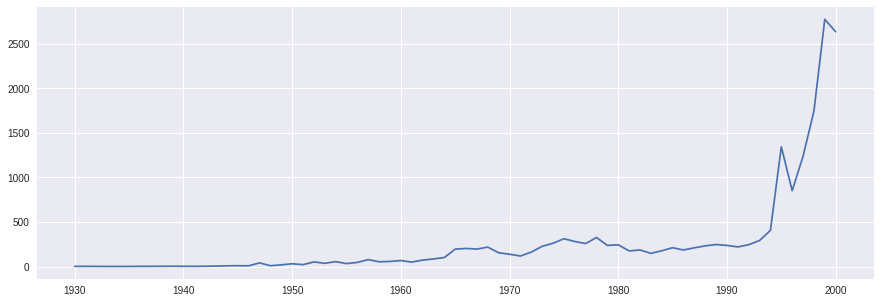

In [136]:
counts.sort_index().plot()
plt.show()

In [137]:
ufo.groupby('State')['Year'].count()

State
AK     116
AL     193
AR     206
AZ     738
CA    2529
CO     367
CT     225
Ca       1
DE      43
FL     837
Fl       4
GA     325
HI      85
IA     162
ID     130
IL     613
IN     326
KS     176
KY     244
LA     174
MA     322
MD     215
ME     181
MI     591
MN     254
MO     448
MS     139
MT     144
NC     356
ND      51
NE     101
NH     125
NJ     370
NM     241
NV     284
NY     914
OH     667
OK     193
OR     534
PA     598
RI      67
SC     166
SD      57
TN     286
TX    1027
UT     193
VA     299
VT      44
WA    1322
WI     357
WV     132
WY      69
Name: Year, dtype: int64

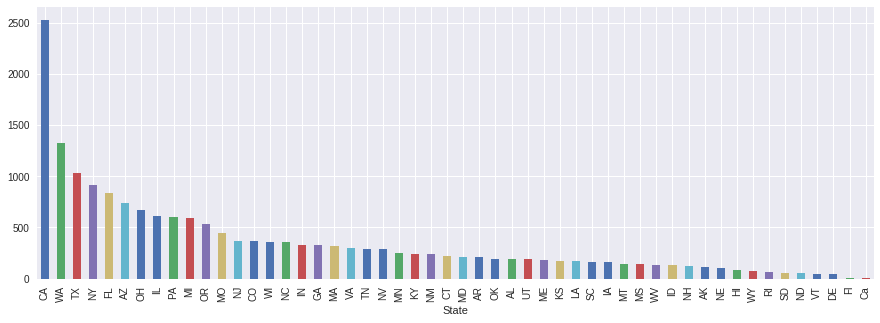

In [138]:
ufo.groupby('State')['Year'].count().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [140]:
ufo.groupby('Shape Reported')['Year'].count()

Shape Reported
CHEVRON       248
CIGAR         617
CIRCLE       1365
CONE           60
CRESCENT        2
CROSS          36
CYLINDER      294
DELTA           7
DIAMOND       234
DISK         2122
DOME            1
EGG           197
FIREBALL     1039
FLARE           1
FLASH         188
FORMATION     434
HEXAGON         1
LIGHT        2803
OTHER        1402
OVAL          845
PYRAMID         1
RECTANGLE     303
ROUND           2
SPHERE       1054
TEARDROP      119
TRIANGLE     1889
VARIOUS       333
Name: Year, dtype: int64

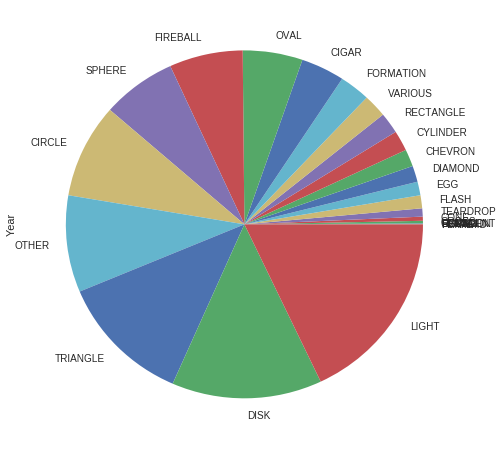

In [141]:
ufo.groupby('Shape Reported')['Year'].count().squeeze().sort_values().plot.pie(figsize=(8, 8))
plt.show()

In [142]:
gas_prices = pd.read_csv("data/gas_prices.csv")

In [143]:
gas_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
Year           19 non-null int64
Australia      18 non-null float64
Canada         19 non-null float64
France         19 non-null float64
Germany        19 non-null float64
Italy          19 non-null float64
Japan          19 non-null float64
Mexico         19 non-null float64
South Korea    19 non-null float64
UK             19 non-null float64
USA            19 non-null float64
dtypes: float64(10), int64(1)
memory usage: 1.7 KB


In [144]:
gas_prices = gas_prices.set_index('Year')

In [147]:
gas_prices

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06


In [145]:
gas_prices.max()

Australia      4.45
Canada         4.08
France         7.51
Germany        7.75
Italy          7.63
Japan          5.74
Mexico         2.45
South Korea    6.21
UK             7.42
USA            3.27
dtype: float64

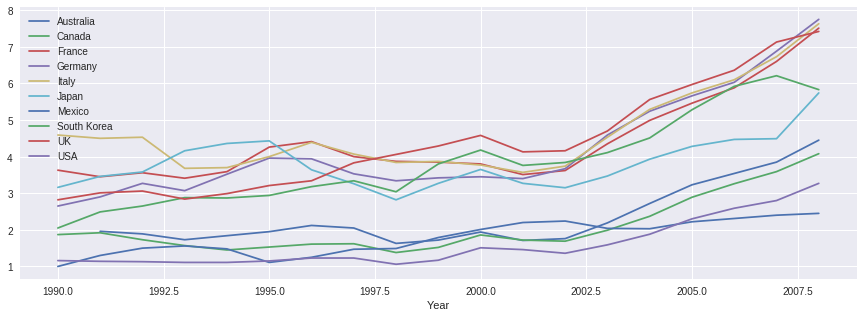

In [146]:
gas_prices.plot()
plt.show()

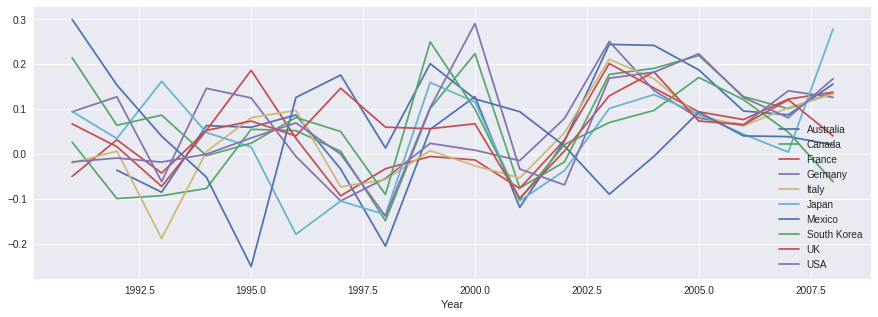

In [148]:
gas_prices.pct_change().plot()
plt.show()

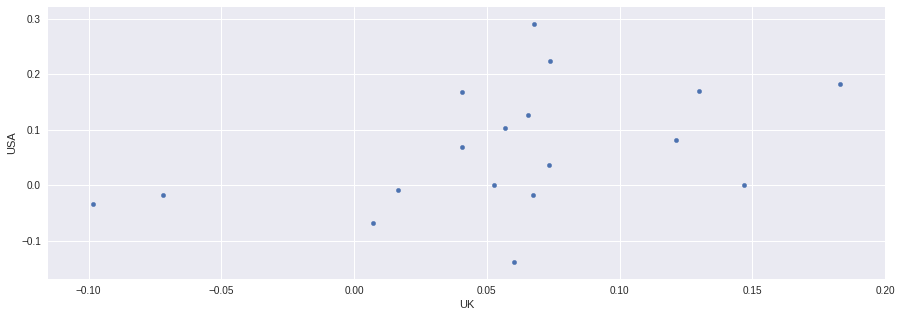

In [150]:
gas_prices.pct_change().plot.scatter(x='UK',y='USA')
plt.show()

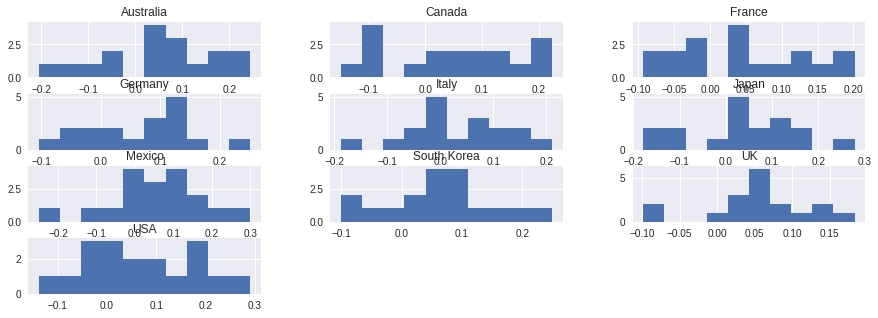

In [151]:
gas_prices.pct_change().hist()
plt.show()

# Case Examples

## Case 1

In [156]:
df = pd.read_csv('data/LTV.csv',sep='\t')

In [157]:
df.head()

,Date,Transaction ID,Product SKU,user_id,Product Revenue,Unique Purchases
0,31-Dec-20,190023660,82435,105634,46.92,1
1,31-Dec-20,189951049,82736,13852034,388.80,1
2,31-Dec-20,189906075,77925,13851031,323.98,1
3,31-Dec-20,189882840,52669,495982,54.55,1
4,31-Dec-20,189811385,65556,11239177,15.92,1


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224716 entries, 0 to 224715
Data columns (total 6 columns):
Date                224716 non-null object
Transaction ID      224716 non-null int64
Product SKU         224716 non-null object
user_id             224716 non-null int64
Product Revenue     224716 non-null float64
Unique Purchases    224716 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.3+ MB


In [159]:
from datetime import datetime

In [160]:
df = pd.read_csv('data/LTV.csv',
                 sep='\t',
                 parse_dates=[0],
                 date_parser = lambda x: datetime.strptime(x,'%d-%b-%y'))

In [161]:
df.head()

,Date,Transaction ID,Product SKU,user_id,Product Revenue,Unique Purchases
0,2020-12-31,190023660,82435,105634,46.92,1
1,2020-12-31,189951049,82736,13852034,388.80,1
2,2020-12-31,189906075,77925,13851031,323.98,1
3,2020-12-31,189882840,52669,495982,54.55,1
4,2020-12-31,189811385,65556,11239177,15.92,1


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224716 entries, 0 to 224715
Data columns (total 6 columns):
Date                224716 non-null datetime64[ns]
Transaction ID      224716 non-null int64
Product SKU         224716 non-null object
user_id             224716 non-null int64
Product Revenue     224716 non-null float64
Unique Purchases    224716 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 10.3+ MB


In [ ]:
# The purchase count by customer

In [163]:
purchases = df.groupby('user_id')['Unique Purchases'].sum()
purchases

user_id
3           32
97          17
175          7
242         15
293          9
320         24
469          2
718         16
807          8
869          8
957          6
963          3
999         10
1009        13
1136         8
1214         6
1249        23
1263        12
1281        11
1424         2
1436         3
1547        18
1577         2
1579        27
1614         2
1625         8
1669        24
1727         4
1831         2
1946         7
            ..
13854012     3
13854016     3
13854017    10
13854024     5
13854025     3
13854026     2
13854027     1
13854028     3
13854029     3
13854030     1
13855000     2
13855001     4
13855003     2
13855007    17
13855010     1
13855012     4
13855013     1
13855014     4
13855015     3
13855016     4
13855020     3
13855022     1
13855025     2
13855026     1
13855027     2
13855030     1
13855033     1
50181000     3
50212002     1
50250004     1
Name: Unique Purchases, Length: 31811, dtype: int64

In [164]:
purchases.describe()

count    31811.000000
mean         7.071170
std          7.591361
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max        195.000000
Name: Unique Purchases, dtype: float64

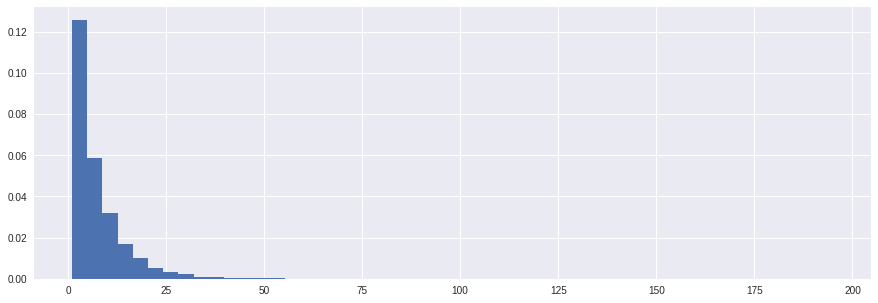

In [165]:
purchases.hist(bins=50,density=True)
plt.show()

In [168]:
purchases.mean()

7.071170349878972

In [169]:
purchases.sort_values(ascending=False)

user_id
10843211    195
13709006    128
270693      124
133390      119
11761030    107
11631993    107
10681051    107
10801501     95
12503352     95
11395096     84
253326       83
11781478     83
13052080     82
12500240     79
13602186     76
200583       75
133394       75
337645       74
12140290     73
11864456     71
518359       70
163484       70
13617125     68
12164041     67
11775092     65
12730577     64
278091       64
60731        64
13774176     64
340606       63
           ... 
13176035      1
13174052      1
13168016      1
13167047      1
13199013      1
13199060      1
226263        1
13199158      1
13205030      1
13205029      1
226338        1
13205028      1
13205027      1
226650        1
13205026      1
13205024      1
13205023      1
13205022      1
13205019      1
13205018      1
13204188      1
13204139      1
13204083      1
13203167      1
13202178      1
13202054      1
13201009      1
13200101      1
13200023      1
50250004      1
Name: Unique Pur

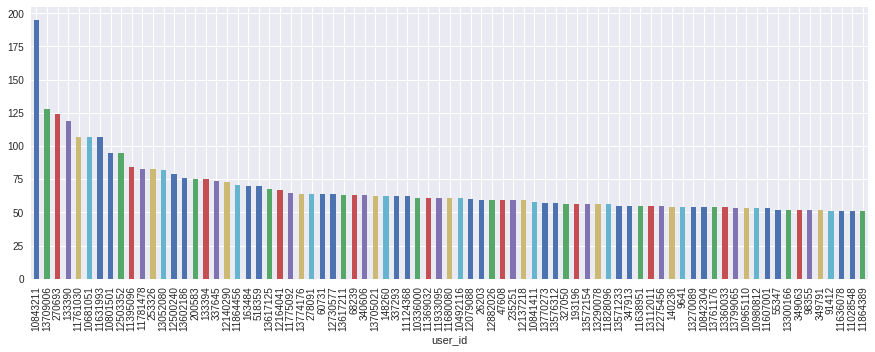

In [170]:
mask = purchases > 50
purchases[mask].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
# purchase frequency by customer

In [182]:
today = df['Date'].max()

def abs_frequency(x):
    delta = x.max() - x.min()
    return delta.days/x.shape[0]

df.groupby(['user_id','Transaction ID']).count()

Date  Product SKU  Product Revenue  Unique Purchases
user_id  Transaction ID                                                      
3        184069919          9            9                9                 9
         187939564         23           23               23                23
97       187414255         17           17               17                17
175      185340755          7            7                7                 7
242      186419948         15           15               15                15
293      184067189          9            9                9                 9
320      184013788          8            8                8                 8
         185995595          2            2                2                 2
         186456651          7            7                7                 7
         186936358          3            3                3                 3
         188263931          4            4                4                 4
469      189139825          2            2                2                 2
718      186596893         16           16               16                16
807      186770800          8            8                8                 8
869      184745308          8            8                8                 8
957      187460227          6            6                6                 6
963      186546589          3            3                3                 3
999      186917711         10           10               10                10
1009     186404369          7            7                7                 7
         187711480          6            6                6                 6
1136     185916154          8            8                8                 8
1214     184212673          2            2                2                 2
         186921633          2            2                2                 2
         188247506          2            2                2                 2
1249     184356035          6            6                6                 6
         185710915          2            2                2                 2
         187360800          7            7                7                 7
         187555676          8            8                8                 8
1263     187818168         12           12               12                12
1281     183981208          2            2                2                 2
...                       ...          ...              ...               ...
13854012 189750361          3            3                3                 3
13854016 189786032          3            3                3                 3
13854017 189850698         10           10               10                10
13854024 189876756          5            5                5                 5
13854025 189895325          3            3                3                 3
13854026 189899378          2            2                2                 2
13854027 189905341          1            1                1                 1
13854028 189933771          3            3                3                 3
13854029 189991419          3            3                3                 3
13854030 190027627          1            1                1                 1
13855000 189457044          2            2                2                 2
13855001 189466137          4            4                4                 4
13855003 189490905          2            2                2                 2
13855007 189529159         17           17               17                17
13855010 189700068          1            1                1                 1
13855012 189749018          4            4                4                 4
13855013 189754970          1            1                1                 1
13855014 189762748          4            4                4                 4
13855015 189779185          3            3     

In [184]:
# correct version
x = df.groupby('user_id')['Transaction ID'].agg(lambda x: np.unique(x).shape[0])
x

user_id
3           2
97          1
175         1
242         1
293         1
320         5
469         1
718         1
807         1
869         1
957         1
963         1
999         1
1009        2
1136        1
1214        3
1249        4
1263        1
1281        2
1424        1
1436        1
1547        1
1577        1
1579        1
1614        1
1625        1
1669        2
1727        2
1831        1
1946        2
           ..
13854012    1
13854016    1
13854017    1
13854024    1
13854025    1
13854026    1
13854027    1
13854028    1
13854029    1
13854030    1
13855000    1
13855001    1
13855003    1
13855007    1
13855010    1
13855012    1
13855013    1
13855014    1
13855015    1
13855016    1
13855020    1
13855022    1
13855025    1
13855026    1
13855027    1
13855030    1
13855033    1
50181000    1
50212002    1
50250004    1
Name: Transaction ID, Length: 31811, dtype: int64

In [185]:
x.sort_values()

user_id
12206050     1
13054134     1
13054124     1
13054086     1
13054037     1
13054018     1
13054014     1
13053349     1
13053283     1
13053281     1
13053278     1
13053254     1
13054179     1
13053245     1
13053198     1
13053185     1
13053147     1
13053096     1
13053056     1
13053026     1
13053016     1
13052338     1
13052324     1
13052253     1
13052205     1
13053205     1
13054187     1
13054201     1
13054216     1
13056209     1
            ..
13604300    11
270693      11
10823624    11
10726327    11
13633176    11
13756449    11
10385000    11
10843211    12
10354001    12
11414079    12
13761039    12
11134163    12
10681051    12
13473096    13
13759245    13
13617054    13
13617312    13
13598302    14
10343000    14
10338000    14
11354070    14
13761066    15
13025152    18
82881       19
13617013    20
133390      22
11732003    23
13617125    24
13617211    24
10336000    45
Name: Transaction ID, Length: 31811, dtype: int64

In [181]:
df[df['Transaction ID'] == 184069919]

,Date,Transaction ID,Product SKU,user_id,Product Revenue,Unique Purchases
215501,2020-12-01,184069919,51612,3,16.41,1
215504,2020-12-01,184069919,72123,3,46.10,1
217249,2020-12-01,184069919,54970,3,32.44,1
217617,2020-12-01,184069919,80209,3,8.16,1
218212,2020-12-01,184069919,58621,3,26.50,1
219181,2020-12-01,184069919,68497,3,7.26,1
221670,2020-12-01,184069919,68818,3,18.20,1
223106,2020-12-01,184069919,77066,3,6.94,1
224179,2020-12-01,184069919,52772,3,32.44,1


In [186]:
# frequency measurement inside the differences between first and last seen
user_ids = df['user_id'].value_counts() > 1
user_ids = user_ids[user_ids].index

In [187]:
mask = df['user_id'].isin(user_ids)

In [ ]:
def purchase_frequency(x):
    # TODO: correct by trx. id. <---
    return x.sort_values().diff().mean()

arrival_times = df[mask].groupby('user_id')['Date'].agg(purchase_frequency)
arrival_times # unit: time/purchase

In [ ]:
df[df['user_id'] == 175]

In [ ]:
df.columns

In [ ]:
# frequently bought together

In [188]:
d = df.groupby('Transaction ID')['Product SKU'].agg(lambda x: tuple(x))

In [190]:
a = pd.Series([e for i,e in d.iteritems() if len(e) > 1])
a

0                      (52669, 53512, 53319, 56264, 69709)
1                                    (74184, 69856, 56284)
2                      (68331, 65454, 68329, 65452, 65451)
3                                           (56244, 80313)
4                                           (69902, 69856)
5                                           (80313, 56244)
6                                           (56244, 59542)
7                                           (69854, 56244)
8                                           (68030, 64010)
9                                    (70514, 64616, 69902)
10                            (63697, 69852, 68015, 69902)
11                                          (69854, 56244)
12                                          (66723, 66815)
13                                   (80313, 60853, 69934)
14                                          (54992, 63690)
15                                   (54194, 70184, 68391)
16                            (52669, 63401, 65676, 6390

In [191]:
# TODO: a method by Mehmet
a.value_counts()

(58267, 74278, 78834)                                                                                                                                                                     39
(78834, 58267, 74278)                                                                                                                                                                     37
(78834, 74278, 58267)                                                                                                                                                                     37
(58267, 78834, 74278)                                                                                                                                                                     36
(74278, 78834, 58267)                                                                                                                                                                     34
(74278, 58267, 78834)                                  

## Case 2

In [192]:
df = pd.read_csv('data/Product Sales Performance.csv')

In [193]:
df

,Product SKU,Product List Views,Product Detail Views,Product Adds To Basket,Product Removes From Basket,Product Checkouts,Unique Purchases,Basket-to-Detail Rate,Buy-to-Detail Rate
0,74278,56389,5997,6464,1778,12006,3264,1.077872,0.544272
1,76663,50765,1722,1589,384,3247,828,0.922764,0.480836
2,74184,42065,2793,2782,939,4738,1284,0.996062,0.459721
3,67857,38920,5483,3604,951,7024,1786,0.657304,0.325734
4,59218,27514,4538,1752,578,3172,826,0.386073,0.182019
5,67898,26464,1066,1565,335,3295,673,1.468105,0.631332
6,82475,25819,5598,2463,796,3682,904,0.439979,0.161486
7,63393,19851,4820,6626,2493,11907,2809,1.374689,0.582780
8,83475,19475,3059,267,51,443,119,0.087283,0.038902
9,67119,18759,630,381,125,656,136,0.604762,0.215873


In [ ]:
# the one with the most add without checkout

In [195]:
mask = df['Product Adds To Basket'] >= 1
res = df['Product Adds To Basket'][mask] / (df['Unique Purchases'][mask] + 1)
res = res.dropna().sort_values(ascending=False)
res

1353    252.000000
1506    194.500000
2661    193.000000
2570     36.000000
1356     29.000000
2782     25.000000
4263     24.000000
4896     23.666667
735      21.500000
2656     20.333333
699      20.000000
706      20.000000
687      20.000000
1909     19.000000
1984     19.000000
5998     18.000000
1068     18.000000
2005     17.500000
3677     17.000000
1279     17.000000
1386     16.500000
3015     16.250000
4663     16.000000
4021     16.000000
5427     16.000000
1351     15.222222
2791     14.000000
3941     14.000000
5326     14.000000
4819     14.000000
           ...    
5980      0.500000
4460      0.500000
5808      0.500000
4566      0.500000
5235      0.500000
5706      0.500000
5569      0.500000
5599      0.500000
5601      0.500000
4910      0.500000
5611      0.500000
5612      0.500000
5626      0.500000
5629      0.500000
5696      0.500000
5644      0.500000
5722      0.500000
2283      0.500000
5723      0.500000
5748      0.500000
5769      0.500000
5785      0.

In [196]:
df.loc[1353]

Product SKU                         68544
Product List Views                   1456
Product Detail Views                  419
Product Adds To Basket                504
Product Removes From Basket             4
Product Checkouts                     507
Unique Purchases                        1
Basket-to-Detail Rate             1.20286
Buy-to-Detail Rate             0.00238663
Name: 1353, dtype: object

In [197]:
df.loc[699]

Product SKU                       61122
Product List Views                 2419
Product Detail Views                189
Product Adds To Basket               80
Product Removes From Basket          21
Product Checkouts                    82
Unique Purchases                      3
Basket-to-Detail Rate           0.42328
Buy-to-Detail Rate             0.015873
Name: 699, dtype: object

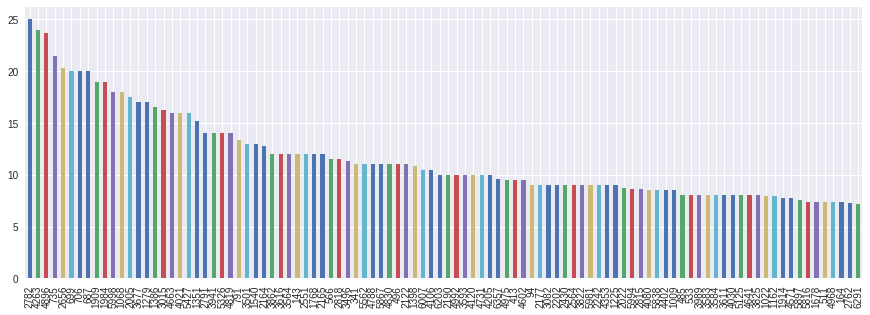

In [199]:
res.iloc[5:].head(100).plot(kind='bar')
plt.show()

In [ ]:
# the one with the most remove-from-basket

In [200]:
df.sort_values('Product Removes From Basket',axis=0,ascending=False)

,Product SKU,Product List Views,Product Detail Views,Product Adds To Basket,Product Removes From Basket,Product Checkouts,Unique Purchases,Basket-to-Detail Rate,Buy-to-Detail Rate
7,63393,19851,4820,6626,2493,11907,2809,1.374689,0.582780
121,51612,6023,5623,6184,1841,11966,3007,1.099769,0.534768
0,74278,56389,5997,6464,1778,12006,3264,1.077872,0.544272
14,52669,17309,3839,6888,1395,15570,3891,1.794217,1.013545
48,64517,8554,1968,4736,1279,6512,1487,2.406504,0.755589
95,83365,6566,9406,3371,999,6766,1540,0.358388,0.163725
3,67857,38920,5483,3604,951,7024,1786,0.657304,0.325734
2,74184,42065,2793,2782,939,4738,1284,0.996062,0.459721
81,68989,7258,1804,2215,910,3068,772,1.227827,0.427938
168,72123,5355,1511,2465,810,4307,1033,1.631370,0.683653


# Next Week

- Linear Regression
- Interpretation of Linear Regression
- Hypothesis Tests